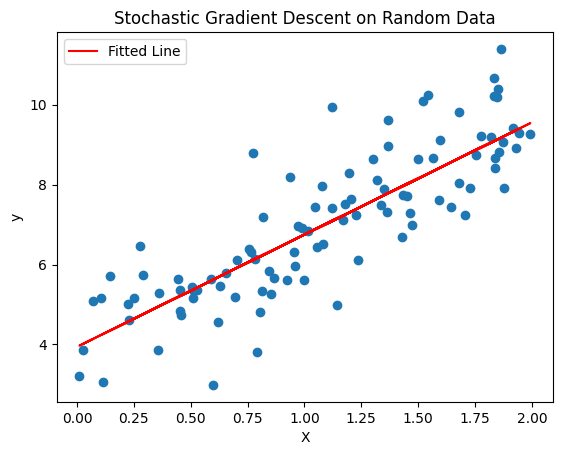

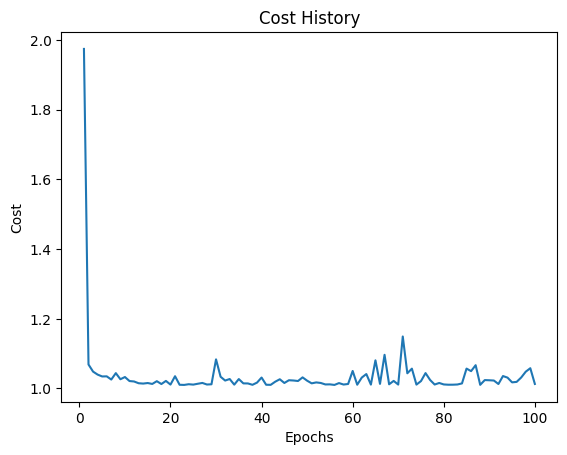


Theta (intercept, slope): [3.94045243 2.8088865 ]





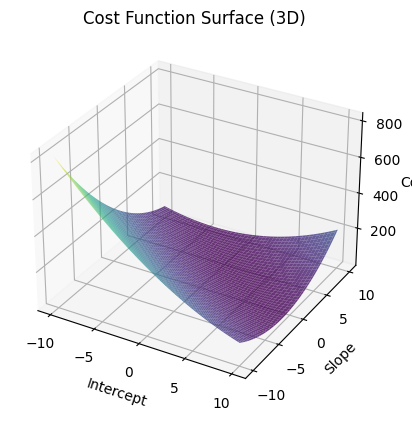

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Random Data
np.random.seed(50)                        # Seed is a starting point used to initialize a random number generator algorithm.
X = 2 * np.random.rand(100, 1)            # Generating 100 random samples between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)
""" Creating target values with added noise;
The np.random.randn(100, 1) generates 100 random numbers from a standard normal distribution
(mean=0, standard deviation=1).
"""


# Defining Stochastic Gradient Descent function
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=100):
    """
    Performing stochastic gradient descent to fit a linear model to the data.

    Parameters:
        X (numpy.ndarray): Input features with shape (m, n+1), where m is the number of samples and n is the number of features.
        y (numpy.ndarray): Target values with shape (m, 1).
        learning_rate (float): Learning rate for gradient descent (default: 0.01).
        epochs (int): Number of iterations/epochs for gradient descent (default: 100).

    Returns:
        theta (numpy.ndarray): Fitted model parameters with shape (n+1, 1).
        cost_history (list): List of cost values during training.
    """
    m, n = X.shape
    theta = np.random.randn(n, 1)  # Initializing theta with random values

    cost_history = []  # Creating a list to store the cost values during training

    for epoch in range(epochs):  # Looping through each epoch for training
        for i in range(m):  # Looping through each sample in a random order (stochastic)
            random_index = np.random.randint(m)  # Randomly selecting an index
            xi = X[random_index:random_index + 1]  # Getting the corresponding sample
            yi = y[random_index:random_index + 1]  # Getting the corresponding target value
            gradient = xi.T.dot(xi.dot(theta) - yi)  # Computing gradient using the stochastic sample
            theta = theta - learning_rate * gradient  # Updating theta using the learning rate and gradient

        # Computing cost for the current theta and storing it in the cost_history list
        cost = np.mean((X.dot(theta) - y) ** 2)
        cost_history.append(cost)

    return theta, cost_history

X_b = np.c_[np.ones((100, 1)), X]  # Adding a column of ones to X (bias term)

# Applying Stochastic Gradient Descent
learning_rate = 0.01  # Setting the learning rate for the gradient descent algorithm
epochs = 100  # Setting the number of iterations (epochs) for training
theta, cost_history = stochastic_gradient_descent(X_b, y, learning_rate, epochs)  # Performing SGD

# Plotting the data points and the fitted line
plt.scatter(X, y)  # Scatter plotting the data points
plt.xlabel('X')  # Labeling the X-axis
plt.ylabel('y')  # Labeling the Y-axis
plt.title('Stochastic Gradient Descent on Random Data')  # Setting the plot title
plt.plot(X, X_b.dot(theta), color='red', label='Fitted Line')  # Plotting the fitted line using the learned theta
plt.legend()  # Showing the legend
plt.show()  # Displaying the plot

print("\n\n")

# Plotting the cost history
plt.plot(range(1, epochs + 1), cost_history)  # Plotting cost history against epochs
plt.xlabel('Epochs')  # Labeling the X-axis
plt.ylabel('Cost')  # Labeling the Y-axis
plt.title('Cost History')  # Setting the plot title
plt.show()  # Displaying the plot

print("\nTheta (intercept, slope):", theta.flatten())  # Printing the learned model parameters
print("\n\n")
# Creating a 3D plot of the cost function surface
intercept_range = np.linspace(-10, 10, 100)  # Creating an array of intercept values from -10 to 10
slope_range = np.linspace(-10, 10, 100)  # Creating an array of slope values from -10 to 10
intercept_mesh, slope_mesh = np.meshgrid(intercept_range, slope_range)  # Creating meshgrid for 3D plot
cost_mesh = np.zeros_like(intercept_mesh)  # Initializing cost mesh with zeros

for i in range(intercept_range.size):
    for j in range(slope_range.size):
        theta_ij = np.array([[intercept_mesh[i, j]], [slope_mesh[i, j]]])  # Getting intercept and slope values
        cost_mesh[i, j] = np.mean((X_b.dot(theta_ij) - y) ** 2)  # Computing cost for each combination of intercept and slope

fig = plt.figure()  # Creating a new figure for 3D plot
ax = fig.add_subplot(111, projection='3d')  # Adding a 3D subplot to the figure
ax.plot_surface(intercept_mesh, slope_mesh, cost_mesh, cmap='viridis', alpha=0.8)  # Plotting the cost function surface
ax.set_xlabel('Intercept')  # Labeling the X-axis
ax.set_ylabel('Slope')  # Labeling the Y-axis
ax.set_zlabel('Cost')  # Labeling the Z-axis
ax.set_title('Cost Function Surface (3D)')  # Setting the plot title
plt.show()  # Displaying the 3D plot
